In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('salaries.csv')
print(df.shape)
df.head()
df["salary"]



(73148, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
1,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
2,2025,SE,FT,Data Product Owner,170000,USD,170000,US,0,US,M
3,2025,SE,FT,Data Product Owner,110000,USD,110000,US,0,US,M
4,2025,SE,FT,Engineer,143000,USD,143000,US,0,US,M


In [113]:
df = df.drop(['salary', 'salary_currency'], axis=1)


In [114]:
#Convert salary to SAR
if 'salary_in_usd' in df.columns:
    usd_to_sar_rate = 3.75
    df['salary'] = df['salary_in_usd'] * usd_to_sar_rate
    df = df.drop('salary_in_usd', axis=1)
else:
    print("'salary_in_usd' column not found in DataFrame.")

df.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary
0,2025,SE,FT,Data Product Owner,US,0,US,M,637500.0
1,2025,SE,FT,Data Product Owner,US,0,US,M,412500.0
2,2025,SE,FT,Data Product Owner,US,0,US,M,637500.0
3,2025,SE,FT,Data Product Owner,US,0,US,M,412500.0
4,2025,SE,FT,Engineer,US,0,US,M,536250.0


In [115]:
#Columns to encode
columns_to_encode = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']

#Add encoded columns and rearrange
for col in columns_to_encode:
    encoded_col = col + '_encoded'
    df[encoded_col] = df[col].astype('category').cat.codes

#Get the current column order
    cols = df.columns.tolist()

#Move the encoded column next to the original column
    col_index = cols.index(col)
    cols.insert(col_index + 1, cols.pop(cols.index(encoded_col)))
    df = df[cols]

df.head()

,work_year,experience_level,experience_level_encoded,employment_type,employment_type_encoded,job_title,job_title_encoded,employee_residence,employee_residence_encoded,remote_ratio,company_location,company_location_encoded,company_size,company_size_encoded,salary
0,2025,SE,3,FT,2,Data Product Owner,133,US,88,0,US,82,M,1,637500.0
1,2025,SE,3,FT,2,Data Product Owner,133,US,88,0,US,82,M,1,412500.0
2,2025,SE,3,FT,2,Data Product Owner,133,US,88,0,US,82,M,1,637500.0
3,2025,SE,3,FT,2,Data Product Owner,133,US,88,0,US,82,M,1,412500.0
4,2025,SE,3,FT,2,Engineer,169,US,88,0,US,82,M,1,536250.0


In [116]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73148 entries, 0 to 73147
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   work_year                   73148 non-null  int64  
 1   experience_level            73148 non-null  object 
 2   experience_level_encoded    73148 non-null  int8   
 3   employment_type             73148 non-null  object 
 4   employment_type_encoded     73148 non-null  int8   
 5   job_title                   73148 non-null  object 
 6   job_title_encoded           73148 non-null  int16  
 7   employee_residence          73148 non-null  object 
 8   employee_residence_encoded  73148 non-null  int8   
 9   remote_ratio                73148 non-null  int64  
 10  company_location            73148 non-null  object 
 11  company_location_encoded    73148 non-null  int8   
 12  company_size                73148 non-null  object 
 13  company_size_encoded        731

,work_year,experience_level_encoded,employment_type_encoded,job_title_encoded,employee_residence_encoded,remote_ratio,company_location_encoded,company_size_encoded,salary
count,73148.000000,73148.000000,73148.000000,73148.000000,73148.000000,73148.000000,73148.000000,73148.000000,7.314800e+04
mean,2023.831192,2.378384,1.998100,151.118158,82.086851,21.582955,76.571540,0.969897,5.925516e+05
std,0.477551,0.916602,0.103709,75.977281,18.843257,41.023051,17.400197,0.186555,2.718799e+05
min,2020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.625000e+04
25%,2024.000000,2.000000,2.000000,95.000000,88.000000,0.000000,82.000000,1.000000,4.008375e+05
50%,2024.000000,3.000000,2.000000,142.000000,88.000000,0.000000,82.000000,1.000000,5.531250e+05
75%,2024.000000,3.000000,2.000000,207.000000,88.000000,0.000000,82.000000,1.000000,7.488750e+05
max,2025.000000,3.000000,3.000000,288.000000,92.000000,100.000000,85.000000,2.000000,3.000000e+06


In [117]:
print(df['salary'].head())
print(df['salary'].describe())

0    637500.0
1    412500.0
2    637500.0
3    412500.0
4    536250.0
Name: salary, dtype: float64
count    7.314800e+04
mean     5.925516e+05
std      2.718799e+05
min      5.625000e+04
25%      4.008375e+05
50%      5.531250e+05
75%      7.488750e+05
max      3.000000e+06
Name: salary, dtype: float64


In [118]:
print("Data dimensions:", df.shape)

null_counts = df.isnull().sum()
print("Missing values per column:\n", null_counts)

df = df.dropna()

Data dimensions: (73148, 15)
Missing values per column:
 work_year                     0
experience_level              0
experience_level_encoded      0
employment_type               0
employment_type_encoded       0
job_title                     0
job_title_encoded             0
employee_residence            0
employee_residence_encoded    0
remote_ratio                  0
company_location              0
company_location_encoded      0
company_size                  0
company_size_encoded          0
salary                        0
dtype: int64


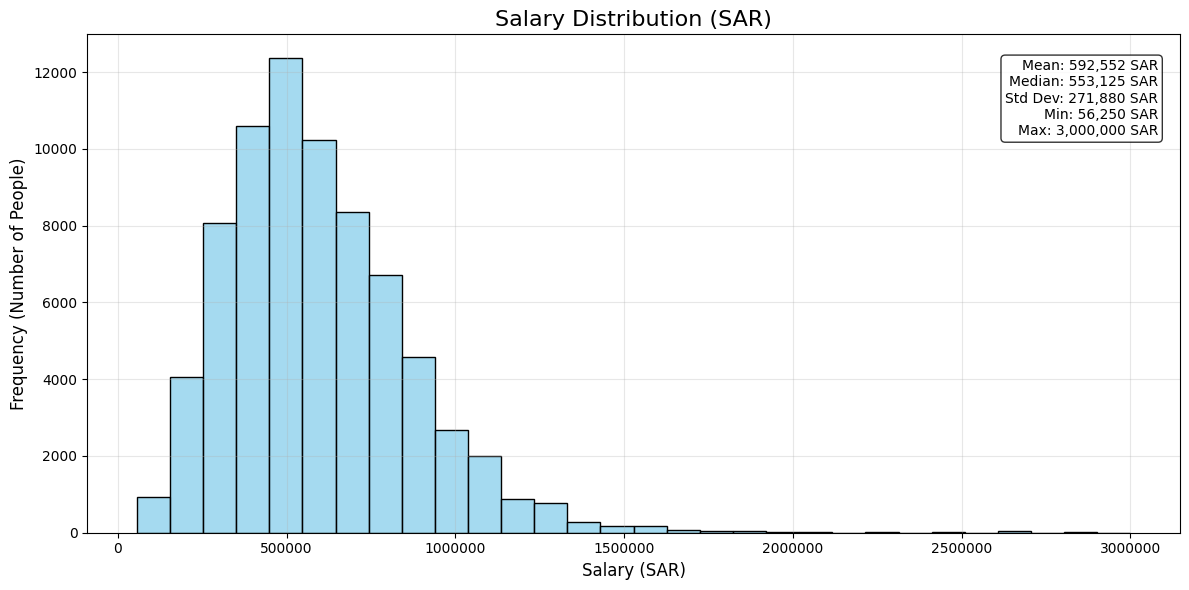

In [119]:
plt.figure(figsize=(12, 6))

# Simple histogram using seaborn
sns.histplot(df['salary'], bins=30, color='skyblue', edgecolor='black')

plt.ticklabel_format(style='plain', axis='x')

stats_text = (
    f"Mean: {df['salary'].mean():,.0f} SAR\n"
    f"Median: {df['salary'].median():,.0f} SAR\n"
    f"Std Dev: {df['salary'].std():,.0f} SAR\n"
    f"Min: {df['salary'].min():,.0f} SAR\n"
    f"Max: {df['salary'].max():,.0f} SAR"
)

plt.annotate(stats_text,
             xy=(0.98, 0.95), xycoords='axes fraction',
             ha='right', va='top',
             fontsize=10,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.title('Salary Distribution (SAR)', fontsize=16)
plt.xlabel('Salary (SAR)', fontsize=12)
plt.ylabel('Frequency (Number of People)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

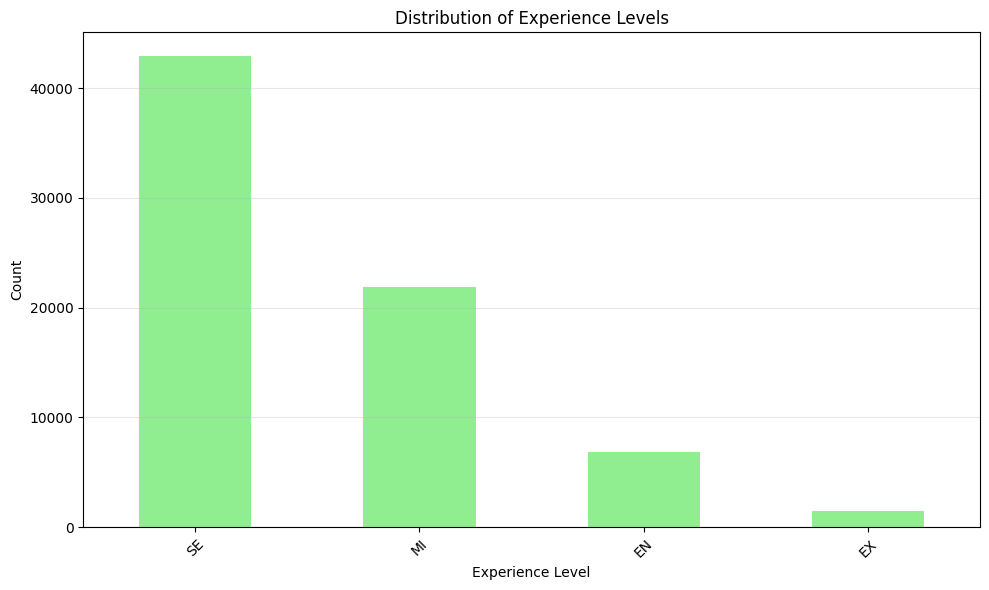

In [120]:
# Plot 2: Bar plot of experience levels
experience_counts = df['experience_level'].value_counts()
plt.figure(figsize=(10, 6))
experience_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

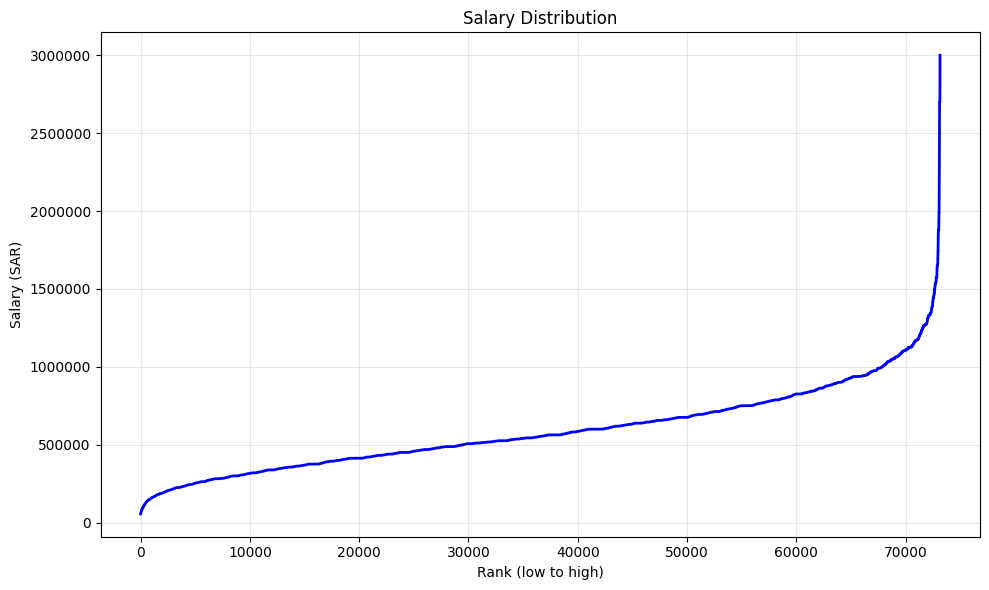

In [121]:
# Simple Univariate Line Chart for Salary
plt.figure(figsize=(10, 6))

# Sort salaries and plot them
sorted_salaries = sorted(df['salary'])
plt.plot(sorted_salaries, color='blue', linewidth=2)

# Simple formatting
plt.title('Salary Distribution')
plt.xlabel('Rank (low to high)')
plt.ylabel('Salary (SAR)')
plt.grid(True, alpha=0.3)

# Fix axis format to show full numbers
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout()
plt.show()

C:\Users\IHCW\AppData\Local\Temp\ipykernel_10676\48163031.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


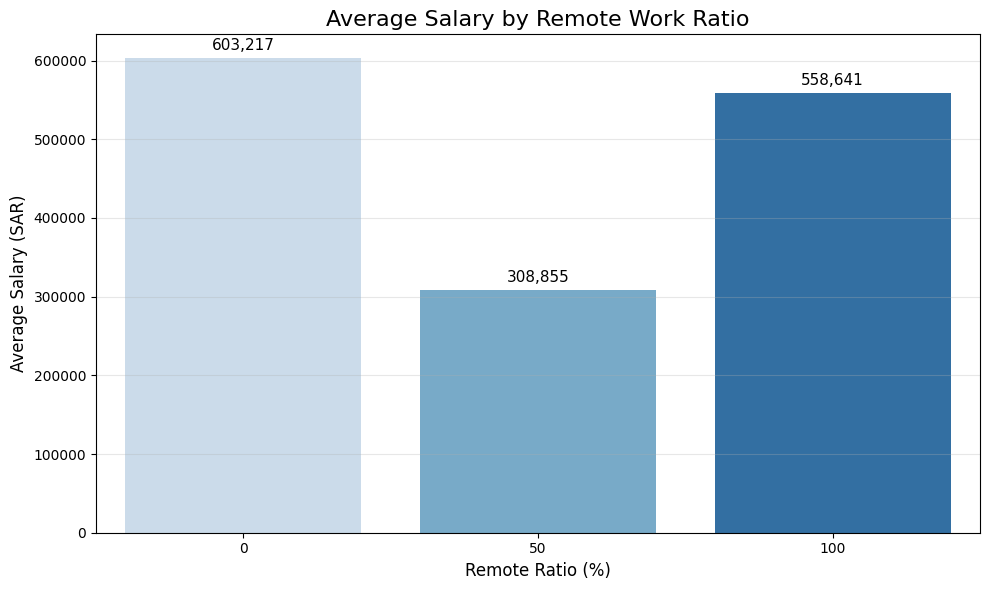

Remote ratio 0%: 57220 employees
Remote ratio 50%: 281 employees
Remote ratio 100%: 15647 employees


In [122]:
# Plot 1: Box plot of salary by experience level
plt.figure(figsize=(10, 6))
sns.barplot(
  x='remote_ratio',
  y='salary',
  data=df,
  estimator='mean',
  palette='Blues',
  errorbar=None
)
plt.title('Average Salary by Remote Work Ratio', fontsize=16)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Average Salary (SAR)', fontsize=12)

# annotate bar values
for bar in plt.gca().patches:
  h = bar.get_height()
  plt.text(
    bar.get_x() + bar.get_width() / 2,
    h + 10000,
    f'{int(h):,}',
    ha='center',
    fontsize=11
  )

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# print counts per remote ratio
remote_counts = df['remote_ratio'].value_counts().sort_index()
for ratio, cnt in remote_counts.items():
  print(f"Remote ratio {ratio}%: {cnt} employees")


C:\Users\IHCW\AppData\Local\Temp\ipykernel_10676\1589878936.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


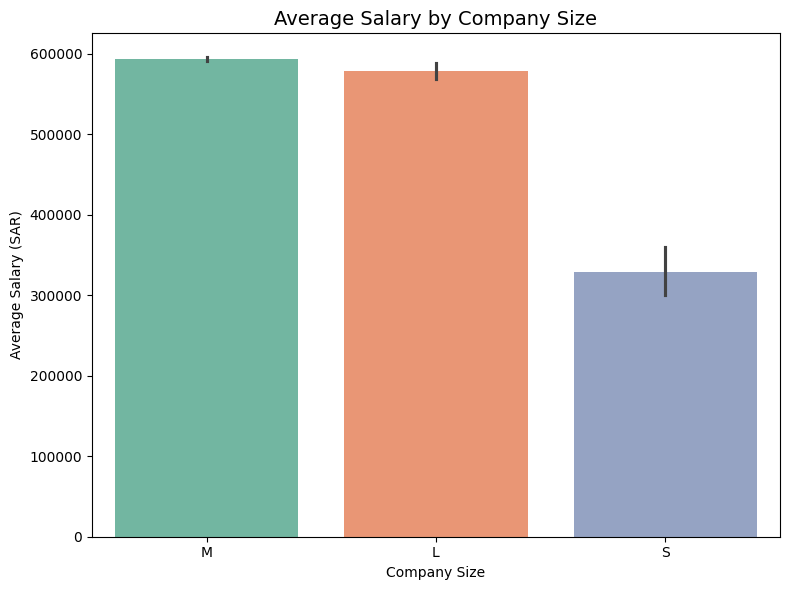

In [123]:
# Bivariate Analysis: Bar chart showing relationship between company size and average salary
plt.figure(figsize=(8, 6))
sns.barplot(
  x='company_size',
  y='salary',
  data=df,
  estimator='mean',
  palette='Set2',
  order=df['company_size'].unique()
)
plt.title('Average Salary by Company Size', fontsize=14)
plt.xlabel('Company Size')
plt.ylabel('Average Salary (SAR)')
plt.tight_layout()
plt.show()

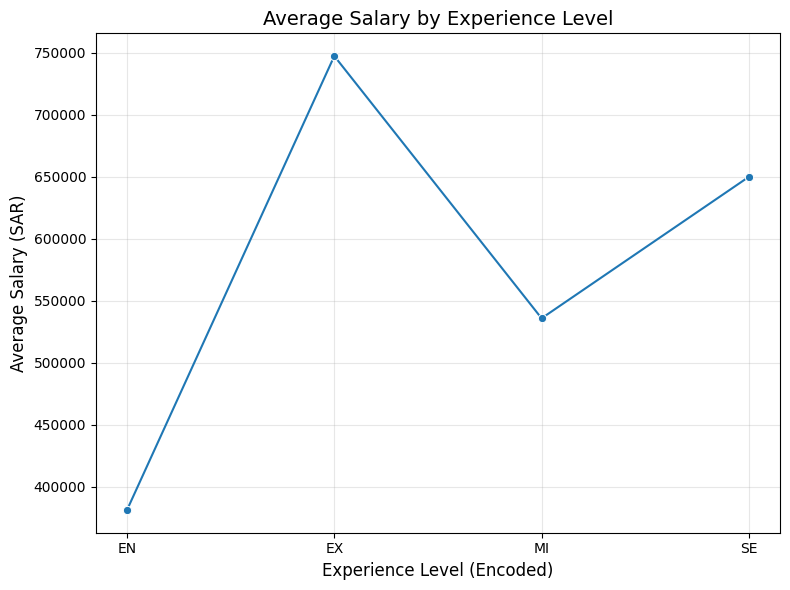

In [124]:
# Compute average salary by experience level
salary_by_exp = df.groupby('experience_level')['salary'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.lineplot(
  data=salary_by_exp,
  x='experience_level',
  y='salary',
  marker='o'
)
plt.title('Average Salary by Experience Level', fontsize=14)
plt.xlabel('Experience Level (Encoded)', fontsize=12)
plt.ylabel('Average Salary (SAR)', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

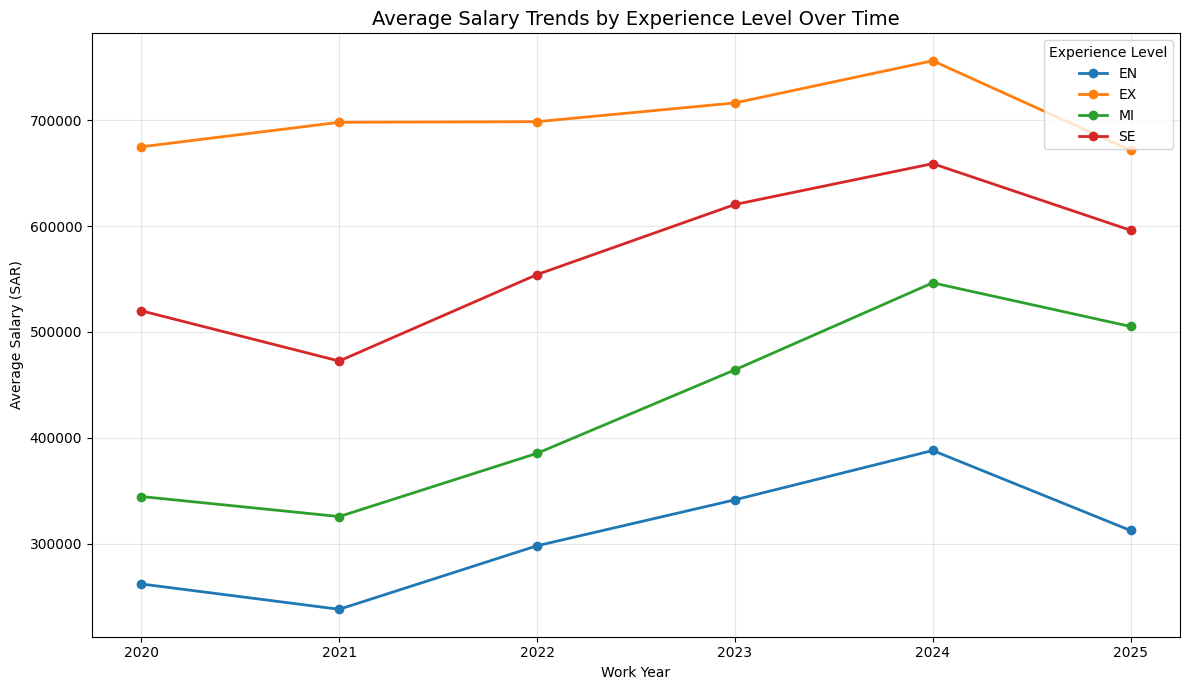

In [125]:
# Plot 1: Multivariate line chart - Average salary by experience level over work year
salary_by_exp_year = df.groupby(['experience_level', 'work_year'])['salary'].mean().reset_index()

pivot_data = salary_by_exp_year.pivot(index='work_year', columns='experience_level', values='salary')

plt.figure(figsize=(12, 7))
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', linewidth=2, label=column)

plt.title('Average Salary Trends by Experience Level Over Time', fontsize=14)
plt.xlabel('Work Year')
plt.ylabel('Average Salary (SAR)')
plt.legend(title='Experience Level')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

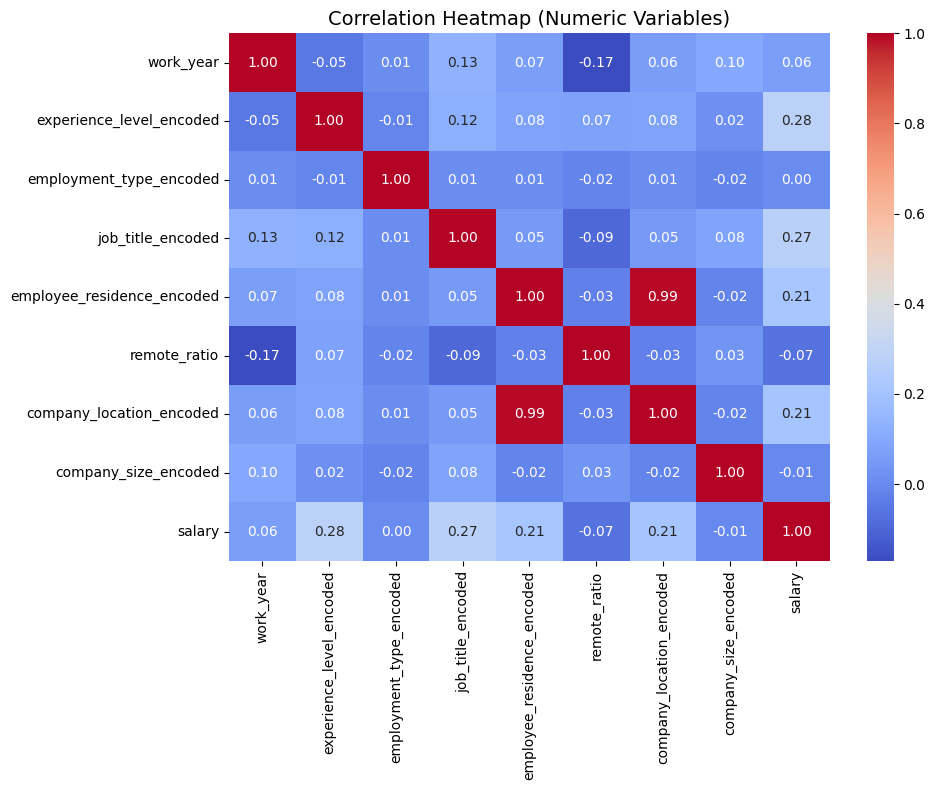

In [126]:
# Plot 2: Correlation Heatmap (Numeric Variables)

plt.figure(figsize=(10, 8))
# Select only numeric columns to avoid conversion errors
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Variables)", fontsize=14)
plt.tight_layout()
plt.show()

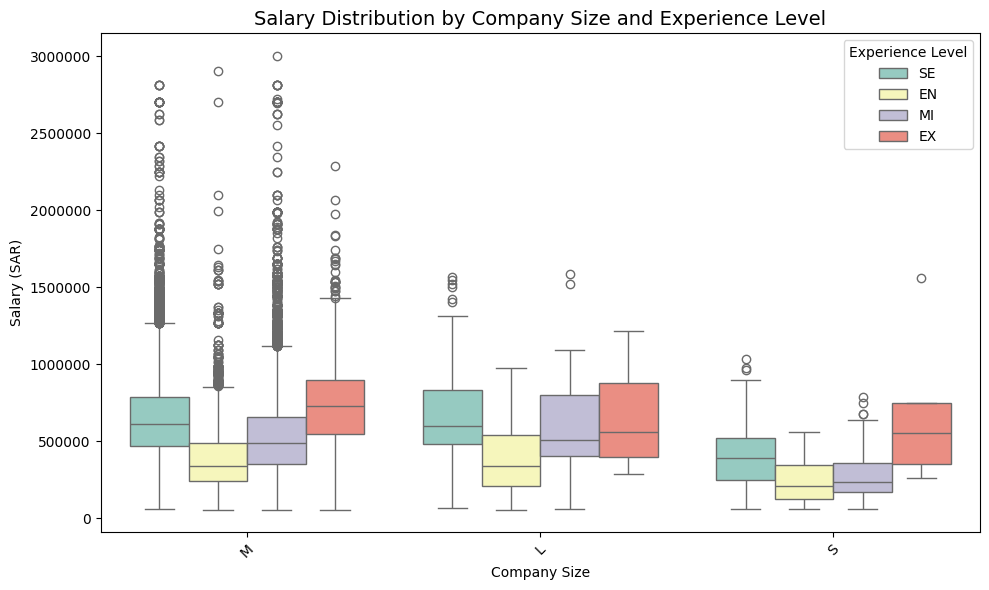

In [127]:
# Plot 3: Simple Multivariate Box Plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df,
    x="company_size",
    y="salary",
    hue="experience_level",
    palette="Set3"
)

plt.ticklabel_format(style='plain', axis='y')

plt.title("Salary Distribution by Company Size and Experience Level", fontsize=14)
plt.xlabel("Company Size")
plt.ylabel("Salary (SAR)")
plt.xticks(rotation=45)
plt.legend(title="Experience Level")
plt.tight_layout()
plt.show()

In [128]:
features = ['salary', 'work_year', 'company_size_encoded']

stats = {}
for feature in features:
    data = df[feature]
    mean_val = data.mean()
    std_val = data.std()
    median_val = data.median()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    stats[feature] = {
        'mean': mean_val,
        'std': std_val,
        'median': median_val,
        'Q1': Q1,
        'Q3': Q3,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

for feature, stat in stats.items():
    print(f"Feature: {feature}")
    for key, value in stat.items():
        print(f" {key}: {value}")
    print("-" * 40)

Feature: salary
 mean: 592551.5573221414
 std: 271879.8927313679
 median: 553125.0
 Q1: 400837.5
 Q3: 748875.0
 lower_bound: -121218.75
 upper_bound: 1270931.25
----------------------------------------
Feature: work_year
 mean: 2023.8311915568436
 std: 0.47755124849060177
 median: 2024.0
 Q1: 2024.0
 Q3: 2024.0
 lower_bound: 2024.0
 upper_bound: 2024.0
----------------------------------------
Feature: company_size_encoded
 mean: 0.9698966478919451
 std: 0.1865547928295765
 median: 1.0
 Q1: 1.0
 Q3: 1.0
 lower_bound: 1.0
 upper_bound: 1.0
----------------------------------------


In [129]:
numeric_cols = ['salary', 'remote_ratio', 'work_year']

df_filtered = df.copy()

for col in numeric_cols:
    Q1 = df_filtered[col].quantile(0.25)
    Q3 = df_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

print("Original shape:", df.shape)
print("Filtered shape:", df_filtered.shape)

df = df_filtered

Original shape: (73148, 15)
Filtered shape: (49120, 15)


In [130]:
# Get numeric columns from the DataFrame
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Compute skewness for each numeric feature
skewness = df[numeric_cols].skew()
print("Skewness of numeric features:")
print(skewness)

# Classify the features based on skewness:
normal_features = []
mildly_skewed_features = []
highly_skewed_features = []

for feature, skew in skewness.items():
    if -0.5 <= skew <= 0.5:
        normal_features.append(feature)
    elif (-1 <= skew < -0.5) or (0.5 < skew <= 1):
        mildly_skewed_features.append(feature)
    else:
        highly_skewed_features.append(feature)

print("\nNormal distribution features (skewness between -0.5 and 0.5):", normal_features)
print("Mildly skewed features (skewness between -1 and -0.5 or 0.5 and 1):", mildly_skewed_features)
print("Highly skewed features (skewness < -1 or > 1):", highly_skewed_features)

Skewness of numeric features:
work_year                      0.000000
experience_level_encoded      -1.410401
employment_type_encoded      -12.914818
job_title_encoded              0.052055
employee_residence_encoded    -3.141802
remote_ratio                   0.000000
company_location_encoded      -3.164161
company_size_encoded          -5.407451
salary                         0.449108
dtype: float64

Normal distribution features (skewness between -0.5 and 0.5): ['work_year', 'job_title_encoded', 'remote_ratio', 'salary']
Mildly skewed features (skewness between -1 and -0.5 or 0.5 and 1): []
Highly skewed features (skewness < -1 or > 1): ['experience_level_encoded', 'employment_type_encoded', 'employee_residence_encoded', 'company_location_encoded', 'company_size_encoded']


In [131]:
# Select only the specified columns
columns_to_keep = [
    "work_year",
    "experience_level_encoded",
    "employment_type_encoded",
    "job_title_encoded",
    "employee_residence_encoded",
    "remote_ratio",
    "company_location_encoded",
    "company_size_encoded",
    "salary"
]
df = df[columns_to_keep]

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('salary', axis=1)  # Features
y = df['salary']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (39296, 8) (39296,)
Testing set shape (X_test, y_test): (9824, 8) (9824,)


In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Initialize the model
model = LinearRegression()

# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
mae_list = []
mse_list = []
r2_list = []

# Perform K-Fold cross-validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Train the model on the training fold
    model.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_val_pred = model.predict(X_val_fold)
    
    # Calculate metrics
    mae = mean_absolute_error(y_val_fold, y_val_pred)
    mse = mean_squared_error(y_val_fold, y_val_pred)
    r2 = r2_score(y_val_fold, y_val_pred)
    
    # Append metrics to lists
    mae_list.append(mae)
    mse_list.append(mse)
    r2_list.append(r2)

# Print average metrics across all folds
print("K-Fold Cross-Validation Metrics (Training Data):")
print(f"Average Mean Absolute Error (MAE): {np.mean(mae_list)}")
print(f"Average Mean Squared Error (MSE): {np.mean(mse_list)}")
print(f"Average R² Score: {np.mean(r2_list)}")

K-Fold Cross-Validation Metrics (Training Data):
Average Mean Absolute Error (MAE): 174568.56505141145
Average Mean Squared Error (MSE): 46876518763.99558
Average R² Score: 0.21414013252743852


In [133]:
# Train the model on the full training data
model.fit(X_train, y_train)

# Predict on the test data
y_test_pred = model.predict(X_test)

# Calculate metrics on the test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print the test metrics
print("Test Data Metrics:")
print(f"Mean Absolute Error (MAE): {test_mae}")
print(f"Mean Squared Error (MSE): {test_mse}")
print(f"R² Score: {test_r2}")

Test Data Metrics:
Mean Absolute Error (MAE): 175913.80949453168
Mean Squared Error (MSE): 47927989138.92391
R² Score: 0.1931618846293568
